<a href="https://colab.research.google.com/github/alfianhid/Iris-Flower-Classification-using-SLP-with-Python/blob/main/Iris_Flower_Classification_using_SLP_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pertama, kita impor library yang dibutuhkan untuk proses training dan plotting data**

In [ ]:
from __future__ import print_function
import matplotlib
import sys
from matplotlib import pyplot as plt
import numpy as np

**Kedua, kita definisikan function 'predict' untuk memprediksi data berdasarkan hasil training**

In [ ]:
def predict(inputs, weights):
    activation = 0.0
    for i, w in zip(inputs, weights):
        activation += i*w
    return 1.0 if activation >= 0.0 else 0.0

**Ketiga, kita definisikan function 'plot' untuk memplotting data berdasarkan hasil training**

In [ ]:
def plot(matrix, weights=None, title="Prediction Matrix"):

    if len(matrix[0]) == 3:  # if 1D inputs, excluding bias and ys
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel("i1")
        ax.set_ylabel("Classifications")

        if weights != None:
            y_min = -0.1
            y_max = 1.1
            x_min = 0.0
            x_max = 1.1
            y_res = 0.001
            x_res = 0.001
            ys = np.arange(y_min, y_max, y_res)
            xs = np.arange(x_min, x_max, x_res)
            zs = []
            for cur_y in np.arange(y_min, y_max, y_res):
                for cur_x in np.arange(x_min, x_max, x_res):
                    zs.append(predict([1.0, cur_x], weights))
            xs, ys = np.meshgrid(xs, ys)
            zs = np.array(zs)
            zs = zs.reshape(xs.shape)
            cp = plt.contourf(xs, ys, zs, levels=[-1, -0.0001, 0, 1], colors=('b', 'r'), alpha=0.1)

        c1_data = [[], []]
        c0_data = [[], []]

        for i in range(len(matrix)):
            cur_i1 = matrix[i][1]
            cur_y = matrix[i][-1]

            if cur_y == 1:
                c1_data[0].append(cur_i1)
                c1_data[1].append(1.0)
            else:
                c0_data[0].append(cur_i1)
                c0_data[1].append(0.0)

        plt.xticks(np.arange(x_min, x_max, 0.1))
        plt.yticks(np.arange(y_min, y_max, 0.1))
        plt.xlim(0, 1.05)
        plt.ylim(-0.05, 1.05)

        c0s = plt.scatter(c0_data[0], c0_data[1], s=50.0, c='r', label='Setosa')
        c1s = plt.scatter(c1_data[0], c1_data[1], s=50.0, c='b', label='Virginica')

        plt.legend(fontsize=10, loc='best')
        plt.show()
        return

    if len(matrix[0]) == 4:  # if 2D inputs, excluding bias and ys
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel("i1")
        ax.set_ylabel("i2")

        if weights != None:
            map_min = 0.0
            map_max = 1.1
            y_res = 0.001
            x_res = 0.001
            ys = np.arange(map_min, map_max, y_res)
            xs = np.arange(map_min, map_max, x_res)
            zs = []
            for cur_y in np.arange(map_min, map_max, y_res):
                for cur_x in np.arange(map_min, map_max, x_res):
                    zs.append(predict([1.0, cur_x, cur_y], weights))
            xs, ys = np.meshgrid(xs, ys)
            zs = np.array(zs)
            zs = zs.reshape(xs.shape)
            cp = plt.contourf(xs, ys, zs, levels=[-1, -0.0001, 0, 1], colors=('b', 'r'), alpha=0.1)

        c1_data = [[], []]
        c0_data = [[], []]
        for i in range(len(matrix)):
            cur_i1 = matrix[i][1]
            cur_i2 = matrix[i][2]
            cur_y = matrix[i][-1]
            if cur_y == 1:
                c1_data[0].append(cur_i1)
                c1_data[1].append(cur_i2)
            else:
                c0_data[0].append(cur_i1)
                c0_data[1].append(cur_i2)

        plt.xticks(np.arange(0.0, 1.1, 0.1))
        plt.yticks(np.arange(0.0, 1.1, 0.1))
        plt.xlim(0, 1.05)
        plt.ylim(0, 1.05)

        c0s = plt.scatter(c0_data[0], c0_data[1], s=50.0, c='r', label='Setosa')
        c1s = plt.scatter(c1_data[0], c1_data[1], s=50.0, c='b', label='Virginica')

        plt.legend(fontsize=10, loc='best')
        plt.show()
        return

    print("Matrix dimensions not covered.")

**Keempat, kita definisikan function 'accuracy' untuk menghasilkan tingkat akurasi prediksi data**

In [ ]:
# each matrix row: up to last row = inputs, last row = y (classification)

def accuracy(matrix, weights):
    num_correct = 0.0
    preds = []
    for i in range(len(matrix)):
        pred = predict(matrix[i][:-1], weights)  # get predicted classification
        preds.append(pred)
        if pred == matrix[i][-1]:
            num_correct += 1.0
    print("Predictions:", preds)
    return num_correct/float(len(matrix))

**Kelima, kita definisikan function 'training_weights' untuk menghasilkan tingkat akurasi training data**

In [ ]:
# each matrix row: up to last row = inputs, last row = y (classification)

def train_weights(matrix, weights, nb_epoch=10, l_rate=1.00, do_plot=False, stop_early=True, verbose=True):
    for epoch in range(nb_epoch):
        cur_acc = accuracy(matrix, weights)
        print("\nEpoch %d \nWeights: " % epoch, weights)
        print("Accuracy: ", cur_acc)

        if cur_acc == 1.0 and stop_early:
            break
        # if do_plot and len(matrix[0])==4: plot(matrix,weights) # if 2D inputs, excluding bias
        if do_plot:
            plot(matrix, weights, title="Epoch %d" % epoch)

        for i in range(len(matrix)):
            prediction = predict(matrix[i][:-1], weights)  # get predicted classificaion
            error = matrix[i][-1]-prediction		 # get error from real classification
            if verbose:
                sys.stdout.write("Training on data at index %d...\n" % (i))
            for j in range(len(weights)): 				 # calculate new weight for each node
                if verbose:
                    sys.stdout.write("\tWeight[%d]: %0.5f --> " % (j, weights[j]))
                weights[j] = weights[j]+(l_rate*error*matrix[i][j])
                if verbose:
                    sys.stdout.write("%0.5f\n" % (weights[j]))

    # if len(matrix[0])==4: plot(matrix,weights) # if 2D inputs, excluding bias
    plot(matrix, weights, title="Final Epoch")
    return weights

**Keenam, kita definisikan function 'test_weights' untuk mengetes apakah data tes kita sudah sesuai dengan hasil training**

In [ ]:
def test_weights(matrix, weights, l_rate=1.00, verbose=True):

    for i in range(len(matrix)):
        prediction = predict(matrix[i][:-1], weights)  # get predicted classificaion
        error = matrix[i][-1]-prediction		 # get error from real classification
        if verbose:
            sys.stdout.write("Testing on data at index %d...\n" % (i))
            print("Predictions:", prediction)
            if error == 0:
                print("Correct")
            else:
                print("Wrong")

    plot(matrix, weights, title="Testing")
    # return weights

**Terakhir, kita jalankan seluruh function tadi dalam main function**

Predictions: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

Epoch 0 
Weights:  [-0.5, -1.5, 3.0]
Accuracy:  0.9555555555555556
Training on data at index 0...
	Weight[0]: -0.50000 --> -0.50000
	Weight[1]: -1.50000 --> -1.50000
	Weight[2]: 3.00000 --> 3.00000
Training on data at index 1...
	Weight[0]: -0.50000 --> -0.50000
	Weight[1]: -1.50000 --> -1.50000
	Weight[2]: 3.00000 --> 3.00000
Training on data at index 2...
	Weight[0]: -0.50000 --> -0.50000
	Weight[1]: -1.50000 --> -1.50000
	Weight[2]: 3.00000 --> 3.00000
Training on data at index 3...
	Weight[0]: -0.50000 --> -0.50000
	Weight[1]

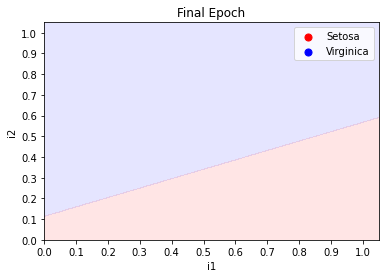

Testing on data at index 0...
Predictions: 0.0
Correct
Testing on data at index 1...
Predictions: 0.0
Correct
Testing on data at index 2...
Predictions: 0.0
Correct
Testing on data at index 3...
Predictions: 0.0
Correct
Testing on data at index 4...
Predictions: 0.0
Correct
Testing on data at index 5...
Predictions: 1.0
Correct
Testing on data at index 6...
Predictions: 1.0
Correct
Testing on data at index 7...
Predictions: 1.0
Correct
Testing on data at index 8...
Predictions: 1.0
Correct
Testing on data at index 9...
Predictions: 1.0
Correct


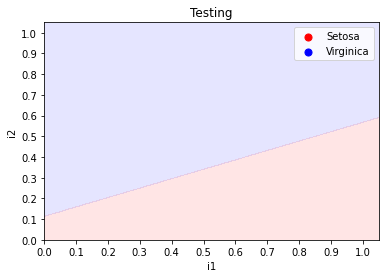

In [ ]:
def main():

    nb_epoch = 10
    l_rate = 1.0
    plot_each_epoch = False
    stop_early = True

    part_A = True

    if part_A:  # 3 inputs (including single bias input), 3 weights

                   # 	Bias 	i1 		i2 		y
        matrix = [	[1.00, 3.50, 0.20, 0.0],
                    [1.00, 3.00, 0.20, 0.0],
                    [1.00, 3.20, 0.20, 0.0],
                    [1.00, 3.10, 0.20, 0.0],
                    [1.00, 3.60, 0.20, 0.0],
                    [1.00, 3.90, 0.40, 0.0],
                    [1.00, 3.40, 0.30, 0.0],
                    [1.00, 3.40, 0.20, 0.0],
                    [1.00, 2.90, 0.20, 0.0],
                    [1.00, 3.10, 0.10, 0.0],
                    [1.00, 3.70, 0.20, 0.0],
                    [1.00, 3.40, 0.20, 0.0],
                    [1.00, 3.00, 0.10, 0.0],
                    [1.00, 3.00, 0.10, 0.0],
                    [1.00, 4.00, 0.20, 0.0],
                    [1.00, 4.40, 0.40, 0.0],
                    [1.00, 3.90, 0.40, 0.0],
                    [1.00, 3.50, 0.30, 0.0],
                    [1.00, 3.80, 0.30, 0.0],
                    [1.00, 3.80, 0.30, 0.0],
                    [1.00, 3.40, 0.20, 0.0],
                    [1.00, 3.70, 0.40, 0.0],
                    [1.00, 3.60, 0.20, 0.0],
                    [1.00, 3.30, 0.50, 0.0],
                    [1.00, 3.40, 0.20, 0.0],
                    [1.00, 3.00, 0.20, 0.0],
                    [1.00, 3.40, 0.40, 0.0],
                    [1.00, 3.50, 0.20, 0.0],
                    [1.00, 3.40, 0.20, 0.0],
                    [1.00, 3.20, 0.20, 0.0],
                    [1.00, 3.10, 0.20, 0.0],
                    [1.00, 3.40, 0.40, 0.0],
                    [1.00, 4.10, 0.10, 0.0],
                    [1.00, 4.20, 0.20, 0.0],
                    [1.00, 3.10, 0.10, 0.0],
                    [1.00, 3.20, 0.20, 0.0],
                    [1.00, 3.50, 0.20, 0.0],
                    [1.00, 3.10, 0.10, 0.0],
                    [1.00, 3.00, 0.20, 0.0],
                    [1.00, 3.40, 0.20, 0.0],
                    [1.00, 3.50, 0.30, 0.0],
                    [1.00, 2.30, 0.30, 0.0],
                    [1.00, 3.20, 0.20, 0.0],
                    [1.00, 3.50, 0.60, 0.0],
                    [1.00, 3.80, 0.40, 0.0],
                    [1.00, 3.30, 2.50, 1.0],
                    [1.00, 2.70, 1.90, 1.0],
                    [1.00, 3.00, 2.10, 1.0],
                    [1.00, 2.90, 1.80, 1.0],
                    [1.00, 3.00, 2.20, 1.0],
                    [1.00, 3.00, 2.10, 1.0],
                    [1.00, 2.50, 1.70, 1.0],
                    [1.00, 2.90, 1.80, 1.0],
                    [1.00, 2.50, 1.80, 1.0],
                    [1.00, 3.60, 2.50, 1.0],
                    [1.00, 3.20, 2.00, 1.0],
                    [1.00, 2.70, 1.90, 1.0],
                    [1.00, 3.00, 2.10, 1.0],
                    [1.00, 2.50, 2.00, 1.0],
                    [1.00, 2.80, 2.40, 1.0],
                    [1.00, 3.20, 2.30, 1.0],
                    [1.00, 3.00, 1.80, 1.0],
                    [1.00, 3.80, 2.20, 1.0],
                    [1.00, 2.60, 2.30, 1.0],
                    [1.00, 2.20, 1.50, 1.0],
                    [1.00, 3.20, 2.30, 1.0],
                    [1.00, 2.80, 2.00, 1.0],
                    [1.00, 2.80, 2.00, 1.0],
                    [1.00, 2.70, 1.80, 1.0],
                    [1.00, 3.30, 2.10, 1.0],
                    [1.00, 3.20, 1.80, 1.0],
                    [1.00, 2.80, 1.80, 1.0],
                    [1.00, 3.00, 1.80, 1.0],
                    [1.00, 2.80, 2.10, 1.0],
                    [1.00, 3.00, 1.60, 1.0],
                    [1.00, 2.80, 1.90, 1.0],
                    [1.00, 3.80, 2.00, 1.0],
                    [1.00, 2.80, 2.20, 1.0],
                    [1.00, 2.80, 1.50, 1.0],
                    [1.00, 2.60, 1.40, 1.0],
                    [1.00, 3.00, 2.30, 1.0],
                    [1.00, 3.40, 2.40, 1.0],
                    [1.00, 3.10, 1.80, 1.0],
                    [1.00, 3.00, 1.80, 1.0],
                    [1.00, 3.10, 2.10, 1.0],
                    [1.00, 3.10, 2.40, 1.0],
                    [1.00, 3.10, 2.30, 1.0],
                    [1.00, 2.70, 1.90, 1.0],
                    [1.00, 3.20, 2.30, 1.0],
                    [1.00, 3.30, 2.50, 1.0]]
        weights = [	 -0.50,	-1.50,  3.00	 ]  # initial weights specified in problem
        # 	Bias 	i1 		i2 		y
        matrixTest = [	[1.00, 3.00, 0.30, 0.0],
                        [1.00, 3.80, 0.20, 0.0],
                        [1.00, 3.20, 0.20, 0.0],
                        [1.00, 3.70, 0.20, 0.0],
                        [1.00, 3.30, 0.20, 0.0],
                        [1.00, 3.00, 2.30, 1.0],
                        [1.00, 2.50, 1.90, 1.0],
                        [1.00, 3.00, 2.00, 1.0],
                        [1.00, 3.40, 2.30, 1.0],
                        [1.00, 3.00, 1.80, 1.0]]

    else:  # 2 inputs (including single bias input), 2 weights

        nb_epoch = 1000

        # 	Bias 	i1 		y
        matrix = [	[1.00,	0.08,	1.0],
                   [1.00,	0.10,	0.0],
                   [1.00,	0.26,	1.0],
                   [1.00,	0.35,	0.0],
                   [1.00,	0.45,	1.0],
                   [1.00,	0.60,	1.0],
                   [1.00,	0.70,	0.0],
                   [1.00,	0.92,	0.0]]
        weights = [	 0.20,	1.00		]  # initial weights specified in problem

    train_weights(matrix, weights=weights, nb_epoch=nb_epoch, l_rate=l_rate,
                  do_plot=plot_each_epoch, stop_early=stop_early)

    test_weights(matrixTest, weights=weights)


if __name__ == '__main__':
    main()